### Bayesian Numerical Example

In [1]:
//using namespace Roostats;
RooStats::SimpleInterval * interval = nullptr;
RooPlot * plot = nullptr; 

First part is just to access the workspace file and retrieve the model and the data 

In [2]:
TString fileName = "CountingModel.root";
TString workspaceName = "w";
TString modelConfigName = "ModelConfig";
TString dataName = "data";
TString integrationType = "";  

In [3]:
auto file = TFile::Open(fileName);


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [4]:
auto w =  (RooWorkspace*) file->Get(workspaceName);
w->Print();
auto mc = (RooStats::ModelConfig*) w->obj(modelConfigName);
auto  data = w->data(dataName);


RooWorkspace(w) w contents

variables
---------
(b,b0,nobs,s,sigmab)

p.d.f.s
-------
RooGaussian::constraint[ x=b0 mean=b sigma=sigmab ] = 1
RooProdPdf::model[ pdf * constraint ] = 0.0732626
RooPoisson::pdf[ x=nobs mean=nexp ] = 0.0732626

functions
--------
RooAddition::nexp[ s + b ] = 4

datasets
--------
RooDataSet::data(nobs)

parameter snapshots
-------------------
ModelConfig__snapshot = (s=3)

named sets
----------
ModelConfig_GlobalObservables:(b0)
ModelConfig_NuisParams:(b)
ModelConfig_Observables:(nobs)
ModelConfig_POI:(s)
ModelConfig__snapshot:(s)

generic objects
---------------
RooStats::ModelConfig::ModelConfig



In [5]:
RooStats::BayesianCalculator bayesianCalc(*data,*mc);

Set the intervar Confidence Level

In [6]:
bayesianCalc.SetConfidenceLevel(0.95);

Set the type of interval

In [7]:
 bayesianCalc.SetLeftSideTailFraction(0.0);

In [8]:
integrationType = "VEGAS";
//bayesianCalc.SetIntegrationType(integrationType); 
bayesianCalc.SetNumIters(1000);

In [9]:
bayesianCalc.SetScanOfPosterior(50);

In [10]:
interval = bayesianCalc.GetInterval();

[#1] INFO:Minization --  Including the following contraint terms in minimization: (constraint)
[#1] INFO:Eval -- BayesianCalculator::GetPosteriorFunction :  nll value 1.92321 poi value = 3
[#1] INFO:Eval -- BayesianCalculator::GetPosteriorFunction : minimum of NLL vs POI for POI =  0 min NLL = 0.3095
[#1] INFO:Eval -- BayesianCalculator - scan posterior function in nbins = 50
[#0] WARNING:Eval -- BayesianCalculator::GetInterval : 612 errors reported in evaluating log-likelihood function 
[#1] INFO:Eval -- BayesianCalculator::GetInterval - found a valid interval : [0 , 4.13532 ]


In [11]:
cout << 100*bayesianCalc.ConfidenceLevel() << "% interval is : ["<< interval->LowerLimit() << ", "<< interval->UpperLimit() <<"] "<<endl;

95% interval is : [0, 4.13532] 


In [12]:
plot = bayesianCalc.GetPosteriorPlot();

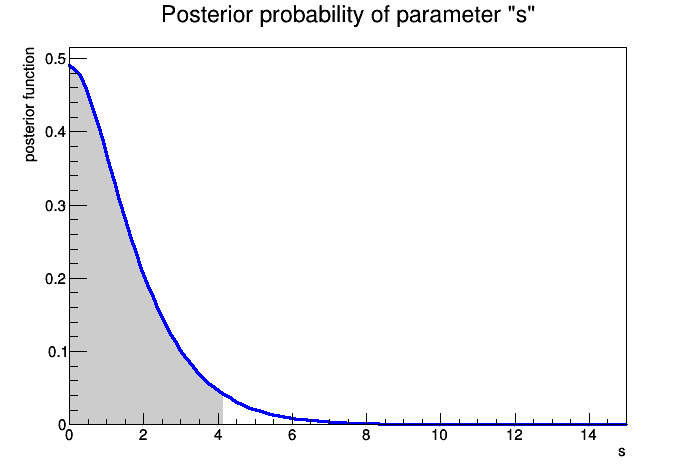

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [13]:
plot->Draw(); gPad->Draw();